# Graph Lab

## Header information:

  - Author #1: Jad Kharboutly (kharbouj@mcmaster.ca)
  - Author #2: Arash Ghafoori (ghafoa@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/ghafoa4/l1-graph-lab
  - Avenue to Learn group name: Graph 24

## Graph Initialization

In [18]:
from GraphBuilder import GraphBuilder
from Utils.MetricsExtractor import Metrics_Extractor

stations_attr, stations = Metrics_Extractor('./_dataset/london.stations.csv').metrics
connections_attr, connections = Metrics_Extractor('./_dataset/london.connections.csv').metrics

graph = GraphBuilder(stations, connections)

## Graph Metrics 

In [19]:
print("Number of nodes (aka. stations): ", graph.getNumberOfNodes())
print("Number of edges (aka. connections): ", graph.getNumberOfEdges())
print("Average node degree", graph.getAverageNodeDegree())

Number of nodes (aka. stations):  8
Number of edges (aka. connections):  406
Average node degree 50.75


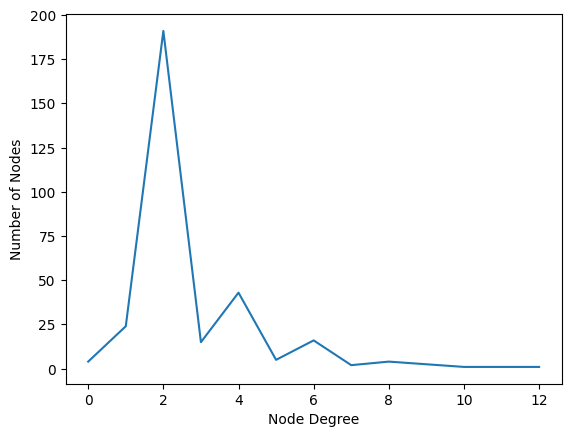

In [20]:
import matplotlib.pyplot as plt

data = {}

for node, neighbors in graph.adj_list.items():
    degree = 0
    for neighbors, time in neighbors.items():
        for time, neighbor in time.items():
            for neighbor, lines in neighbor.items():
                degree += len(lines)
                
    data[degree] = data.get(degree, 0) + 1

x, y = sorted(data.keys()), []

for num in x:
    y.append(data[num])
    
plt.plot(x, y)
plt.xlabel("Node Degree")
plt.ylabel("Number of Nodes")

plt.show()

# Design Choices:



## Graph Structure:
The goal of this assignment was to implement a graph data structure from the given data and find the shortest path possible. In our given data, we were provided with four csv files of connections, stations, lines and tests. The connections file represented the connection between 2 stations and the time and line it takes to move from each station. The station file represented the id of each station, longitude, latitude, name, zone, number of total lines, and the rail. In order to implement a graph data structure, we decided to create two separate classes of GraphMaker and MetricsExtactor, by separating these two we are implementing the OPEN/CLOSED principal. This means that even if we change the data or format of the csv given csv files, we could still implement the MetricsExtractor class by just simply adding new features to it, without being able to modify it.

### Graph Maker

After analyzing the given data from the stations.csv and connection.csv, we concluded that we would have to implement an undirected graph structure for the given data first. So, our initial step was building a class called GraphBuilder which had 3 main attributes of vertices, edges, and adj_list. The vertices and edges were associated with the number of stations and connections respectively. And we use the graph adj_list to represent that is associated with each station. To represent the adjacency list, we implement a dictionary data structure, where each key is associated with the station (vertex) of the graph, this implementation not only made it easier to access the adjacency list of each vertex, but also the amount of memory it consumes is directly correlated with the number of nodes and edges O(n vertices + e edges). However, if we implemented a matrix data structure by using array, we could have consumed n^2 space in our program. 

### Metrics Extractor

In the given instructions, we were warned that there is a possibility that the given data could possibly be changed, therefore the method that we would implement for extracting the data must follow the OPEN/CLOSED principal to ensure that we could implement other formats of csv files as well. In our MetricsExtractor class, we have an attribute of metrics, which is made of two components. The first component is the attributes of the csv file that is given in the first line, and the second component represents the data.

We used a hashmap/dictionary in order to represent the list. The keys represent all the nodes $n$, and the values for each key is the data.

In [4]:
# adj_list = {
#     station_1 : {...},
#     station_2: {...}
#     .
#     .
#     .
# }

The data is represented as a hashmap, where the keys are the adjacent nodes to the respective key in the adjacency list.

In [5]:
# station_1:{
#     station_2:
#     {...},
#     staion_5:{...}
#     }
#     .
#     .
#     .
# }

The value of the adjacent nodes is a hashmap that represents the time it takes to go from station to the other. We could sort the keys of the time dictionary in order to get the lowest time.

In [6]:
# time:{
#     1:[line1, line2],
#     3:[line4]
# }

The values of the time is an array of the different lines connect the two stations.

In [7]:
# adj_list = {
#     station_1:{
#         station_2:{
#             "time":{
#                 1:[line1, line2],
#                 3:[line4]
#             }
#         }
#     },
#     station_2:{...}
#     .
#     .
#     .
# }

Below we haver represented a Class UML Diagram of GraphBuilder

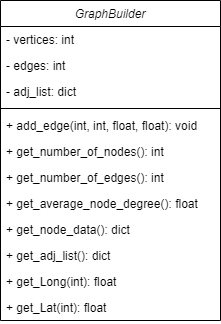

In [21]:
from IPython.display import Image
Image("notebook_images/graphBuilder.png")

## Shortest Path:
After implementing our graph data structure, we had to implement an path finding algorithm that would iterate through the nodes and edges to find the shortest paths. According to the given instructions, we were given the option to implement the two algorithms of Dijkstra and A* algorithm. Since, we are implementing two different algorithms and possibly we plan to add different algorithms, we tried implementing the factory design pattern.
Our factory design pattern was composed of a PathFinderFactory, a PathFinder, and the two algorithms.

### PathFinder Factory
The PathFinder Factory is meant to implement the factory design pattern, this design takes the two instances of the algorithms Dijkstra and A*. This design pattern helps us achieve SOLID principle for our algorithms, by implementing the OPEN/CLOSED principle. This gives us the option to leave our program open for extension of different instances, without being able to our current algorithms.

### PathFinder
The PathFinder class is an abstract class that is composed of two abstract methods, the first method is find_path which locates a path from the start vertex to the destination vertex. The second abstract method is get_path which returns the Path that the algorithm has to take to reach the destination from the start vertex. 

### Dijkstra Algorithm
The Dijkstra algorithm implement edge weight or in our graph structure time to find the shortest path possible. However, the algorithm ignores the number of transfers or lines it takes to find the shortest path. To prevent this shortcoming, we consider another factor in our algorithm, in case there are two possible transfer with the smallest time, we will pick the station that will take less number of line changes as well. This option ensures that we are also considering the number of line transfers as well which could ease route planning for consumers. By using a dictionary to implement of graph adjacency list, we concluded that it takes O(V+E) time to visit each vertex, and the time required to process all the neighbors of a given vertex is O(log(V)), therefore the time complexity of our algorithm would be O((V+E)logV). In addition, our modified version of Dijkstra's algorithm adds an edge weight of +1 to reduce the number of transfer as well.

### A* Algorithm
The A* star algorithm, unlike Dijkstra uses another factor called heuristic to determine the shortest route possible. The first goal of implementing this algorithm is to find the best heuristics possible to determine the shortest path. Based on our given data from the stations, we used the longitude and latitude attributes of each station in our stations adjacency list to determine the shortest path by using the pythagorean theorem. The time complexity of our algorithm in the worst case scenario were all the edges are traversed before reaching the destination will be O(E) which consumes O(V) space of memory.

below, is a graph that we used to test both algorithms:

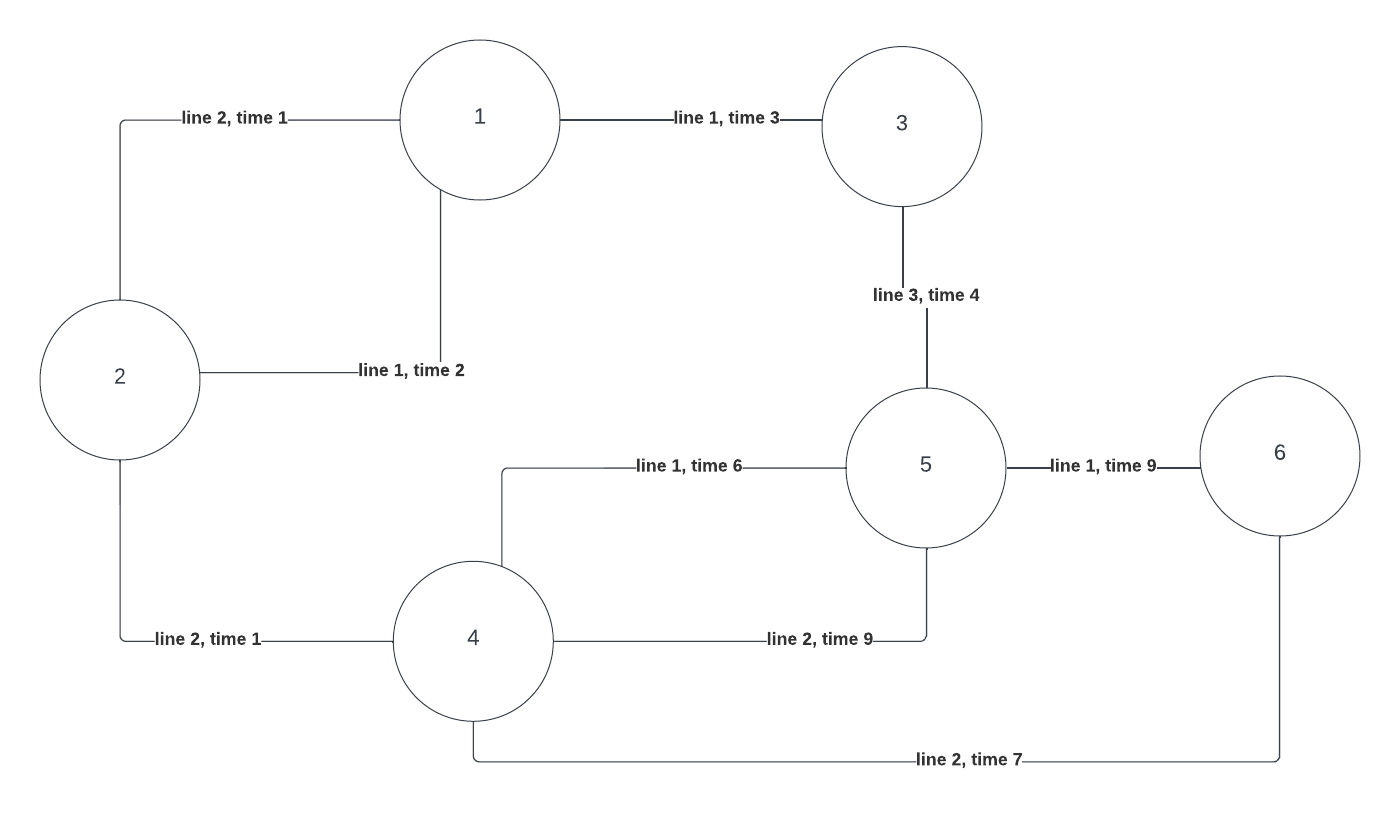

In [22]:
from IPython.display import Image
Image("notebook_images/graph1.png")

below, we have a UML class diagram of our algorithm implementations.

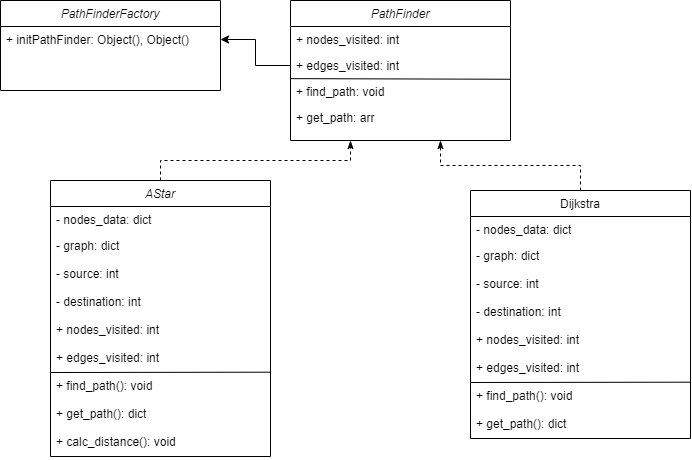

In [23]:
from IPython.display import Image
Image("notebook_images/pathFinder.png")

## Benchmarking:
For the benchmarking, our first challenge was to find what KPIs and factors we need to measure to compare the efficiency of both algorithms. We came to the conclusion that the number of visited nodes and the number of relaxed edgers could be good factors since in both algorithms, we could measure both iterations and could prove to be reliable indicators.

## KPI Benchmarking

In order to benchmark and compare the KPI values of both algorithms, we ran different test cases on different data sets. the first Data set was a graph that we made ourselves from 7 nodes, and the second dataset was the dataset that we were given which was composed of 305 nodes.

In our first test case, we implemented a connected graph with 7 nodes. The results showed that the Dijkstra's algorithm visited 14 nodes and relaxed 5 edges and the A* algorithm visited nodes and relaxed 5 edges. The reason that Dijkstra visits more nodes is because it visits all the nodes to get all the paths from the start vertex where A* algorithm implements the heuristic.

In our second test case, we implemented an unconnected 7 node graph. In this test case both Dijkstra and A* produced the same result. Both algorithms visited 14 nodes and relaxed 5 edges. The reason for this results is because the Dijkstra's algorithm will find the path to all the nodes, and the A* algorithm will use the heuristic.

In our third test case, we implemented a graph that has only one possible path to the target. 

In our fourth test case, we implemented a graph that the start station is equal to the final destination. 

In the end, we implemented the first dataset with the second dataset, which is the given London dataset. After running our algorithms, the results for our first dataset (7 nodes) were 18 node visits and 6 relaxed edges for Dijkstra and 6 visited nodes and 3 relaxed edges for A* algorithm. For the second dataset (302 nodes), Dijkstra's algorithm visited 698 nodes and relaxed 321 edges. And the A* algorithm visited 168 nodes and 84 edges were relaxed. 

In conclusion, we could observe that based on the benchmarking, A* significantly performed much better than in our metrics.

## Execution Time Benchmarking


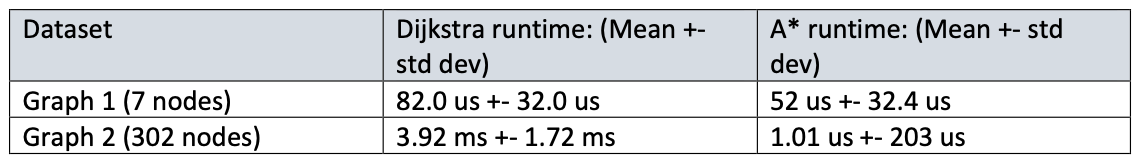

In [24]:
from IPython.display import Image
Image("notebook_images/average.png")

As you can observe from the table above which is a representation of our execution time benchmarks, the results were as we expected. The running time for the A* algorithm was much less relative to the Dijkstra algorithm.

## Work Distribution

Arash Ghafoori: worked on the path finder, A* algorithm and the benchmarking

Jad Kharboutly: worked on the graph structure, Dijkstra and the benchmarking and the testing

## Updated UML Class Diagram for the GraphBuilder

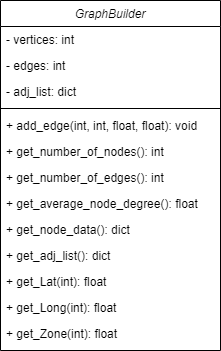

In [25]:
from IPython.display import Image
Image("notebook_images/updatedGraphBuilder.png")

After applying the new implementations, we modified our graph class to be able to implement with the new introduced requirement and class. The new change was the +get_Zone method which returns all the zones in the graph. This method is necessary because it will indicate the zones that is associated with each vertex that will help us determine how these zones are interconnected to each other. This method is correlated with the Subway Patrolling and the Island classes that will be explained later throughout the report.

## Updated UML Class Diagram for the PathFinder

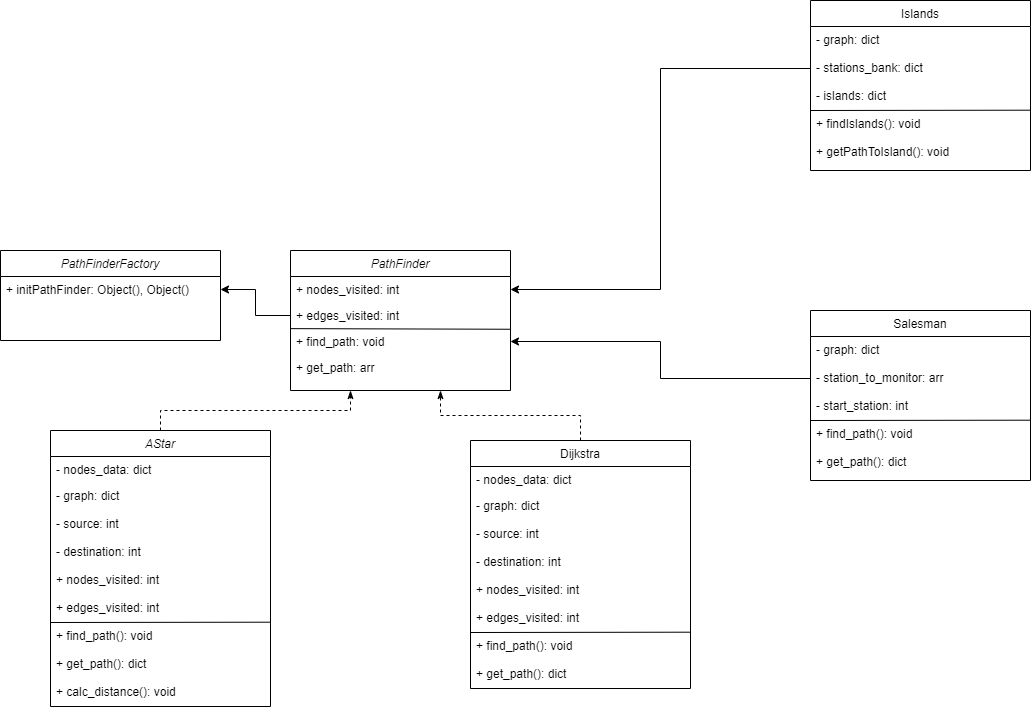

In [26]:
from IPython.display import Image
Image("notebook_images/updatedPathFinder.png")

After applying the new implementations, in our updated class diagram, we introduced two new class of Salesman and Islands to solve the subway patrolling problem. Both of these class indicated a dependency with the Dijkstra class since each of the class uses the Dijkstra's algorithm for certain methods. In addition this UML class diagram is implementing the SOLID principle of Dependency inversion. IN the dependency inversion, a high level module which will be considered the PathFinder in this case should not be depending on a lower level module. In this case the Salesman and Islands class will be considered as the lower level module that are depending on the abstract PathFinder algorithm.

## Subway Patrolling

As mentioned above, in our modified GraphMaker class, we also introduced a new method get_zone which will return the zone that is associated with each vertex. This new method will help us implement the subway patrolling problem. In order to ensure that the subway officers are able to patrol all the stations (vertices) in an efficient way, under the assumption that there is a direct edge between every vertex within the subset. This assumption is related to the "Traveler Salesman's Problem" that was a given as a hint in the document. In this problem, we initially implement the Dijkstra's algorithm to find the shortest possible path between each of the vertices. Next, we implement a cycle known as the Hamiltonian cycle which returns the shortest cycles possible that visits all the vertices in a connected component. Then, by considering a vertex as the starting and the ending point we generate all the possible permutations of the vertices where in each permutation we calculate the travel time that it takes to complete the cycle. After generating the permutations, we record the minimum time it takes to complete the cycle and at the end we return the minimum cost permutation. The time complexity for the traveler salesman problem is considered to be O(V!).

#### empirical point of view

The total running time of a dynamic solution is approximately O(V^2 * 2^V) which is exponential similar to our memory usage despite our time complexity. In conclusion, also the dynamic solution can not be implemented for higher number of stations (vertices). By comparing both the dynamical programming based solution and the naive solution that we implemented, we could conclude that the naive solution is a more costly and inefficient method. And despite the fact that the dynamic solution is also exponential, it would still be a better solution for a higher number of vertices. 

#### Execution times for a 4 node graph

TSP_1: Mean +- std dev: 100 us +- 6 us

TSP_2: Mean +- std dev: 99.9 us +- 3.3 us

TSP_3: Mean +- std dev: 106 us +- 12 us

TSP_4: Mean +- std dev: 107 us +- 12 us

Below is an example of the Traveler Salesman problem algorithm for the following graph:

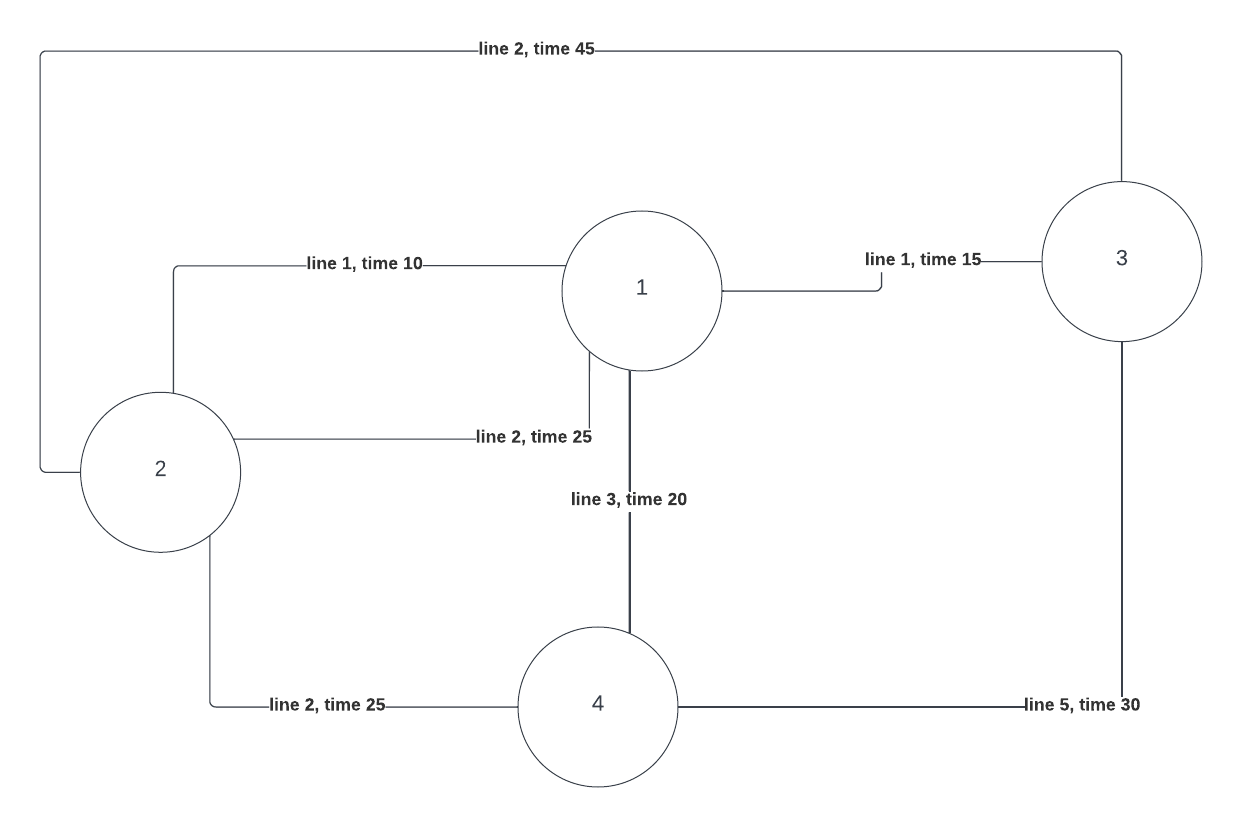

In [27]:
from IPython.display import Image
Image("notebook_images/graph2.png")

In [28]:
from pathfinder.PathFinderFactory import PathFinderFactory
from GraphBuilder import GraphBuilder
from Utils.MetricsExtractor import Metrics_Extractor
from pathfinder.Salesman import Salesman

stations_data = Metrics_Extractor('./_dataset/TSP.graph.stations.csv').metrics
connections_attr, connections = Metrics_Extractor('./_dataset/TSP.graph.connections.csv').metrics

graph = GraphBuilder(stations_data, connections)

print('---- Salesman Algorithm Starting at Node 1 ----')
salesman = Salesman(graph,['1','2','3','4'] , '1').find_path()
print('Min Cost to Patrol: ', salesman["cost"])
print('Shortest Path to Patrol: ', salesman["path"])
print('\n')
print('---- Salesman Algorithm Starting at Node 2 ----')
salesman = Salesman(graph,['1','2','3','4'] , '2').find_path()
print('Min Cost to Patrol: ', salesman["cost"])
print('Shortest Path to Patrol: ', salesman["path"])
print('\n')
print('---- Salesman Algorithm Starting at Node 3 ----')
salesman = Salesman(graph,['1','2','3','4'] , '3').find_path()
print('Min Cost to Patrol: ', salesman["cost"])
print('Shortest Path to Patrol: ', salesman["path"])
print('\n')
print('---- Salesman Algorithm Starting at Node 4 ----')
salesman = Salesman(graph,['1','2','3','4'] , '4').find_path()
print('Min Cost to Patrol: ', salesman["cost"])
print('Shortest Path to Patrol: ', salesman["path"])

---- Salesman Algorithm Starting at Node 1 ----
Min Cost to Patrol:  80
Shortest Path to Patrol:  ['1', '2', '4', '3', '1']


---- Salesman Algorithm Starting at Node 2 ----
Min Cost to Patrol:  80
Shortest Path to Patrol:  ['2', '1', '3', '4', '2']


---- Salesman Algorithm Starting at Node 3 ----
Min Cost to Patrol:  80
Shortest Path to Patrol:  ['3', '1', '2', '4', '3']


---- Salesman Algorithm Starting at Node 4 ----
Min Cost to Patrol:  80
Shortest Path to Patrol:  ['4', '2', '1', '3', '4']


## Urbanism Planning

In this problem, we had to implement a method to find out how the zones that we implemented in the GarphMaker class are connected to each other, and identify the transportation islands between them. We implemented the DFS method to solve this problem. In this problem, we identified that the vertices in the same zone and transportation island are connected components. Time complexity is O(V + E), since all edges and nodes are visited. We ran Dijkstra's algorithm from every point in order to discover the shortest path from one node to another within different islands. The time complexity of the Dijkstra's Algorithm is O((V+E)logV).
#### empirical point of view

Since the total running times for finding the connected components as mentioned above is not exponential, we believe we have an optimal solution by implementing DFS and Dijkstra's algorithm even when the number of vertices increase.

#### Execution times for a 9 node graph

Find Islands: Mean +- std dev: 520 us +- 31 us

Find Paths: Mean +- std dev: 2.83 ms +- 0.19 ms

Below is an executable sample that identifies the transportations islands for the following graph:

In [1]:
from pathfinder.PathFinderFactory import PathFinderFactory
from GraphBuilder import GraphBuilder
from Utils.MetricsExtractor import Metrics_Extractor
from pathfinder.Islands import Islands

stations_data = Metrics_Extractor('./_dataset/Islands.graph.stations.csv').metrics
connections_attr, connections = Metrics_Extractor('./_dataset/Islands.graph.connections.csv').metrics

graph = GraphBuilder(stations_data, connections)

islands = Islands(graph)
islands.findIslands()
paths = islands.getPathToIsland()

print('---- Discovering Islands ----')
print(islands.islands)
print('\n')
for i in range(1, 10):

    print("--- Paths and Zone Connection from Node " + str(i) + " --- ")
    print(paths[str(i)])

---- Discovering Islands ----
{'1': [['1', '2', '3', '4']], '2': [['5', '6'], ['7', '8', '9']]}


--- Paths and Zone Connection from Node 1 --- 
{'1': {'path': ['1'], 'zones': {'1'}}, '2': {'path': ['1', '2'], 'zones': {'1'}}, '4': {'path': ['1', '4'], 'zones': {'1'}}, '3': {'path': ['1', '3'], 'zones': {'1'}}, '5': {'path': ['1', '5'], 'zones': {'2', '1'}}, '6': {'path': ['1', '5', '6'], 'zones': {'2', '1'}}, '9': {'path': ['1', '4', '9'], 'zones': {'2', '1'}}, '8': {'path': ['1', '4', '9', '8'], 'zones': {'2', '1'}}, '7': {'path': ['1', '4', '9', '7'], 'zones': {'2', '1'}}}
--- Paths and Zone Connection from Node 2 --- 
{'2': {'path': ['2'], 'zones': {'1'}}, '1': {'path': ['2', '1'], 'zones': {'1'}}, '4': {'path': ['2', '4'], 'zones': {'1'}}, '3': {'path': ['2', '1', '3'], 'zones': {'1'}}, '5': {'path': ['2', '1', '5'], 'zones': {'2', '1'}}, '6': {'path': ['2', '1', '5', '6'], 'zones': {'2', '1'}}, '9': {'path': ['2', '4', '9'], 'zones': {'2', '1'}}, '8': {'path': ['2', '4', '9', '8'

## Personal Reflection (Arash Ghafoori)

<b> Have you done a similar kind of work in the past? </b>

<b> How do you feel about this piece of work? What parts do you particularly like? Dislike? Why? </b>

<b> What is the one thing you particularly want people to notice about your work? </b>

<b> What would you change if you had the chance to do this project over again? </b>

I have implemented the graphing algorithm in Java in the past and have implemented
different design patterns, however, I have never implemented any of them up to this scale.
Also, this was my first time benchmarking and I had to learn a lot from other resources.

I believe this assignment itself is very useful and interesting, however there were a lot of
content that I was not familiar with, and I had to learn from other resources. It is still fine to
learn from other resources, but the amount of content that was novel was too much. In
addition, I believe the workload for this lab was probably the most compared to all my other
courses which required a lot of time.

I believe how we implemented the algorithms, by following the design patterns and solid
principles and having a good format of code. Also, I believe our benchmarking was still
relatively good although we did not have much experience with benchmark

I believe the main challenge all the students were experiencing was the timing and the
workload of this assignment, If I could change anything, I would change my time management
for this assignment and make sure not to leave a lot of work behind for the last couple of days
since a lot if requirements in this course have not been taught in the past courses.

## Personal Reflection (Jad Kharboutli)

<b> Have you done a similar kind of work in the past? </b>

<b> How do you feel about this piece of work? What parts do you particularly like? Dislike? Why? </b>

<b> What is the one thing you particularly want people to notice about your work? </b>

<b> What would you change if you had the chance to do this project over again? </b>

I have gained experience with design patterns, algorithms, and SOLID principles by practicing
in leet code. I was familiar with the benchmarking concept, but this was my first time
implementing KPIs in the benchmarking.

The assignment was very useful in a way that I got to experience my understandings from the
2C03 algorithm course and 2AA4 architecture and be able to implement it in an application.
However, a lot of content that I was not familiar with made it very time consuming for me to
learn them and implement them in the short time we had available.

I believe the benchmarking and finding out the KPIs and metrics were the most challenging and
time-consuming part of the assignment which I want people to notice. I was also able to
implement all my understanding from my previous courses and leet code practices into this
assignment as well.

I believe the main challenge in this project was to complete everything in time, with the limited
time we had and the huge amount of workload we had both from this course and other
courses. So most likely, the time management was the biggest issue we had.